In [2]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 9999

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [3]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = None
I = [
    [-1.3258, 3.6845, 10.68135, 11.56154],
    [-6.32455, -5.92435, 12.64235, 15.62382],
    [8.54655, 17.82645, -20.43512, 9.45783],
    [18.84653, 11.28945, 8.63421, 7.58153]]


## 1.2 返回矩阵的行数和列数

In [4]:
# TODO 返回矩阵的行数和列数
def shape(M):
    if not isinstance(M[0], list):
        row = 1
        col = 0
    else:
        row, col = len(M), len(M[0])
    return row,col


In [5]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.044s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [6]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    rows_M, cols_M = shape(M)
    for row in range(rows_M):
        for col in range(cols_M):
            val = M[row][col]
            M[row][col] = round(val, decPts)
    pass


In [7]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.017s

OK


## 1.4 计算矩阵的转置

In [8]:
# TODO 计算矩阵的转置
def transpose(M):
    MT = []
    rows_M, cols_M = shape(M)
    for col in range(cols_M):
        temp = []
        for row in range(rows_M):
             val = M[row][col]
             temp.append(val)                
        MT.append(temp)
    return MT


In [9]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.016s

OK


## 1.5 计算矩阵乘法 AB

In [10]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    rows_A, cols_A = shape(A)
    rows_B, cols_B = shape(B)

    if not cols_A == rows_B:
        raise ValueError("Matrix A's columns must be equal to B's rows")

    #创建一个0矩阵，列数等于B的列数，行数等于A的行数
    result = [[0] * cols_B for i in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(rows_B):
                result[i][j] += A[i][k]*B[k][j]

    return result
   

In [11]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.111s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [12]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    rows_A, cols_A = shape(A)
    rows_b, cols_b = shape(b)
    
    if not rows_A == rows_b:
        raise IndexError("Row number of A must be equal to row number of b")
    
    Ab = []
    for i in range(rows_A):
        row_temp = []
        for j in range(cols_A):
            row_temp.append(A[i][j])
        for k in range(cols_b):
            row_temp.append(b[i][k])
        Ab.append(row_temp)
                           
    return Ab


In [13]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [14]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]


In [15]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [16]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError("Scale parameter must be non-zero value")
    for i,ele in enumerate(M[r]):
        M[r][i] = ele * scale
    

In [17]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


In [18]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if scale == 0:
        raise ValueError("Scale parameter must be non-zero")
    for i, ele in enumerate(M[r2]):
        M[r1][i] = M[r1][i] + ele * scale
 

In [19]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

In [20]:
# 不要修改这里！
from helper import *

A = generateMatrix(4,seed,singular=False)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

   7,   5,   3,  -5 ||  1  
  -4,   6,   2,  -2 ||  1  
  -9,   4,  -5,   9 ||  1  
  -9, -10,   5,  -4 ||  1  


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    7 & 5 & 3 & -5 & 1\\
    -4 & 6 & 2 & -2 & 1\\
    -9 & 4 & -5 & 9 & 1\\
    -9 & -10 & 5 & -4 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{-4}{9} & \frac{5}{9} & -1 & \frac{-1}{9}\\
    0 & \frac{38}{9} & \frac{38}{9} & -6 & \frac{5}{9}\\
    0 & \frac{73}{9} & \frac{-8}{9} & 2 & \frac{16}{9}\\
    0 & -14 & 10 & -13 & 0\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{5}{21} & \frac{-37}{63} & \frac{-1}{9}\\
    0 & 1 & \frac{-5}{7} & \frac{13}{14} & 0\\
    0 & 0 & \frac{103}{21} & \frac{-69}{126} & \frac{16}{9}\\
    0 & 0 & \frac{152}{21} & \frac{-625}{63} & \frac{5}{9}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-119}{456} & \frac{-59}{456}\\
    0 & 1 & 0 & \frac{-23}{456} & \frac{25}{456}\\
    0 & 0 & 1 & \frac{-625}{456} & \frac{35}{456}\\
    0 & 0 & 0 & \frac{181}{152} & \frac{213}{152}\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & 0 & 0 & 0 & \frac{193}{1086}\\
    0 & 1 & 0 & 0 & \frac{62}{543}\\
    0 & 0 & 1 & 0 & \frac{1835}{1086}\\
    0 & 0 & 0 & 1 & \frac{213}{181}\end{bmatrix}$

$...$

In [21]:
# 不要修改这里！
A = generateMatrix(4,seed,singular=True)
b = np.ones(shape=(4,1)) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # please make sure you already correct implement augmentMatrix
printInMatrixFormat(Ab,padding=4,truncating=0)

  -7,  -3,   1,  -9 ||  1  
   0,   0,   0,   0 ||  1  
  -2,   7,   7,  -3 ||  1  
   8,  -5,  -6,   3 ||  1  


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$

增广矩阵
$ Ab = \begin{bmatrix}
    -7 & -3 & 1 & -9 & 1\\
    0 & 0 & 0 & 0 & 1\\
    -2 & 7 & 7 & -3 & 1\\
    8 & -5 & -6 & 3 & 1\end{bmatrix}$

$ --> \begin{bmatrix}
    1 & \frac{-5}{8} & \frac{-3}{4} & \frac{3}{8} & \frac{1}{8}\\
    0 & 0 & 0 & 0 & 1\\
    0 & \frac{23}{4} & \frac{11}{2} & \frac{-9}{4} & \frac{5}{4}\\
    0 & \frac{-59}{8} & \frac{-17}{4} & \frac{-51}{8} & \frac{15}{8}\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & \frac{-23}{59} & \frac{54}{59} & \frac{-2}{59}\\
    0 & 1 & \frac{34}{59} & \frac{51}{59} & \frac{-15}{59}\\
    0 & 0 & \frac{129}{59} & \frac{-426}{59} & \frac{160}{59}\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$
    
$ --> \begin{bmatrix}
    1 & 0 & 0 & \frac{-16}{43} & \frac{58}{129}\\
    0 & 1 & 0 & \frac{119}{43} & \frac{-125}{129}\\
    0 & 0 & 1 & \frac{-142}{43} & \frac{160}{129}\\
    0 & 0 & 0 & 0 & 1\end{bmatrix}$

$...$


### 2.3.3 实现 Gaussian Jordan 消元法

In [22]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    #定义一个函数，功能：求矩阵第col列中第i行到第j行的元素的绝对值的最大值,
    #同时返回所在的行号,以及col列中所在目标行的元素的实际值
    def maxAbs_rowidx_InColumn(M,col,i,j):
        max_val = 0 #max value will be found
        target_row_idx = i #index will be found
        act_val = M[i][col] #actual value will be found
        k = i
        while k <= j:
            val = abs(M[k][col])
            if val > max_val:
                max_val = val
                target_row_idx = k
                act_val = M[k][col]
            k += 1
        return target_row_idx, act_val, max_val
    
    
    rows_A, cols_A = shape(A)
    rows_b, cols_b = shape(b)
    if not rows_A == rows_b:
        return None
    Ab = augmentMatrix(A, b)
    for c, _ in enumerate(Ab):
        tg_row_idx, act_val, max_val = maxAbs_rowidx_InColumn(Ab, c, c, rows_A-1)
        if max_val < epsilon:
            return None
        if not tg_row_idx == c:
            #使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行 c）
            swapRows(Ab, c, tg_row_idx)
            
        #使用第二个行变换，将列c的对角线元素缩放为1
        scale = 1/act_val
        scaleRow(Ab, c, scale)
        #多次使用第三个行变换，将列c的其他元素消为0
        tg_rows_set = set(t for t in range(rows_A)) - set({c})
        for r in tg_rows_set:
            scale = -Ab[r][c]
            if not abs(scale) < epsilon:
                addScaledRow(Ab, r, c, scale)
    #四舍五入Ab中每个元素
    matxRound(Ab, decPts=4)
     
    #提取单位矩阵右边的矩阵或向量出来赋给result    
    result = []
    i = 0
    while i < rows_A:
        k = cols_A
        tmp_row_list = []
        while k < len(Ab[0]):
            tmp_row_list.append(Ab[i][k])
            k += 1
        result.append(tmp_row_list)
        i += 1
       
    return result

In [23]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 4.970s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

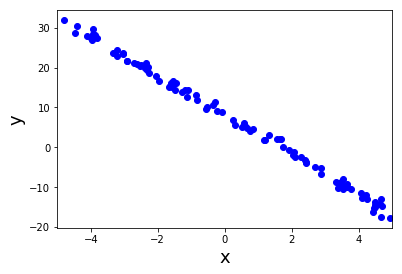

In [24]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

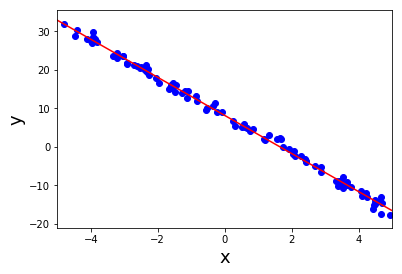

In [55]:
#TODO 请选择最适合的直线 y = mx + b
# m = 0
# b = 0
# m = -5
# b = 8

m = -4.94
b = 8.14

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m*x+b for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [56]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    sum_squared = 0
    mse = 0
    n = len(X)
    for x, y in zip(X, Y):
        sum_squared = sum_squared + (y - m*x - b)**2
    mse = sum_squared/n  
    return mse

print(calculateMSE(X,Y,m,b)) 
# #---------------------------------------
# print(calculateMSE(X,Y,-5, 8.2))
# print(calculateMSE(X,Y,-5, 8.18))
# print(calculateMSE(X,Y,-5, 8.16))
# print(calculateMSE(X,Y,-5, 8.14)) #b = 8.14时最小
#print(calculateMSE(X,Y,-5, 8.12))
##-------------------------------
# print(calculateMSE(X,Y,-4.90, 8.14))
# print(calculateMSE(X,Y,-4.92, 8.14))
# print(calculateMSE(X,Y,-4.94, 8.14))#m = -4.94时最小
# print(calculateMSE(X,Y,-4.96, 8.14))

0.8466438404992873


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m,b$ 让蓝点均匀覆盖在红线周围，然后微调 $m, b$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
    $$
        E = \frac{1}{2}[(1 - 1m - b)^2 + (2 - 2m - b)^2 + (2 - 3m - b)^2]
    $$
- 二元二次方程组，
- 并求解最优参数 $m, b$
    $$
    \begin{cases}
    \displaystyle
    -1(1 - 1m - b)-2(2 - 2m - b)-3(2 - 3m - b) = 0 \\
    \\
    \displaystyle
    -(1 - 1m - b) - (2 - 2m - b) - (2 - 3m - b) = 0 \\
    \end{cases}
    $$
    
    $$
     --> \begin{cases}
    \displaystyle
    m = \frac{1}{2} \\
    \\
    \displaystyle
    b = \frac{2}{3} \\
    \end{cases}
    $$


TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [57]:
# TODO 实现线性回归
'''
参数：X, Y
返回：m，b
'''
from copy import deepcopy

def linearRegression(X,Y):
    #为了不改变X和Y, 把它们分别深度赋值给A和B,然后对A和B操作
    A = deepcopy(X)
    B = deepcopy(Y)
    
    rows_A, cols_A = shape(A)
    rows_B, cols_B = shape(B)
    
    #如果X不是矩阵形式的列表，就转换X的格式
    if cols_A == 0:
        for i in range(len(A)):
            A[i] = list([A[i]] + [1])
            
    #如果Y不是矩阵形式的列表，就转换Y的格式
    if cols_B == 0:
        for i in range(len(B)):
            B[i] = list([B[i]])

    
    #求A的转置AT
    AT = transpose(A)
    
    #求矩阵相乘ATA,A的转置AT乘以A
    ATA = matxMultiply(AT, A)
    
    #创建一个单位矩阵，行列大小与 ATA一样
    I = []
    rows_ATA, cols_ATA = shape(ATA)
    for i in range(rows_ATA):
        tmp_row_list = []
        for j in range(cols_ATA):
            if i == j:
                tmp_row_list.append(1)
            else:
                tmp_row_list.append(0)
        I.append(tmp_row_list)
    
    #利用消元函数gj_Solve()返回增广矩阵[ATA I]消元后的右边的矩阵,即可得到 A 的逆矩阵A_1
    A_1 = gj_Solve(ATA, I)
    
    #求矩阵相乘ATB
    ATB = matxMultiply(AT, B)
      
    #A的逆矩阵A_1乘以矩阵ATB就是最后的解的矩阵
    Beta = matxMultiply(A_1, ATB)
                                       
    return round(Beta[0][0],4), round(Beta[1][0],4)
    

m,b = linearRegression(X,Y)
print(m,b)

-4.837 8.126


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

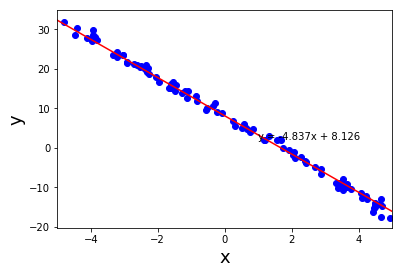

In [58]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m+b, x2*m+b

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.text(1,2,'y = {m}x + {b}'.format(m=m,b=b))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [60]:
mse = calculateMSE(X,Y,m,b)
print(mse) #mse = 0.9341

0.9341065862961798
